In [63]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.IndexSlice

In [38]:
df = pd.read_csv('singapore-property-data.csv')
df.replace('-', pd.np.nan, inplace=True)
df.replace(',', '', regex=True, inplace=True)
df[df.columns[-9:]] = df[df.columns[-9:]].convert_objects(convert_numeric=True)
df[df.columns[-9:]].describe()

/home/arcolife/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Total Number of Units in Project,Cumulative Units Launched to-date,Cumulative Units Sold to-date,Cumulative Units Launched but Unsold,Units Launched in the Month,Units Sold in the Month,Median Price($psm) # in the Month Number Sold By Price Range,Lowest Price ($psm) # in the Month,Highest Price ($psm) # in the Month
count,31683.000000,31683.000000,31683.000000,31683.000000,31683.000000,31683.000000,7020.000000,7020.000000,7020.000000
mean,126.460847,101.389452,91.606414,9.783038,2.986523,2.941483,14729.829345,13865.764957,15545.168519
std,178.322591,158.057582,147.440738,29.291458,27.068105,19.622832,7439.898622,7341.179698,7777.804842
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,12.000000,8.000000,0.000000,0.000000,0.000000,9419.000000,8751.000000,9978.000000
50%,56.000000,40.000000,34.000000,0.000000,0.000000,0.000000,13078.000000,12039.500000,13848.000000
75%,140.000000,108.000000,99.000000,6.000000,0.000000,0.000000,17567.000000,16632.750000,18525.000000
max,1715.000000,1500.000000,1240.000000,670.000000,992.000000,770.000000,73637.000000,73637.000000,73637.000000


# Filter out for experienced developers out there

In [39]:
df0 = df[(df['Cumulative Units Launched but Unsold'] == 0) & \
         (df['Cumulative Units Launched to-date'] != 0)]

# Per year stats for Highest selling streets

In [40]:
for y in df0.year.unique():
    tmp = df0[df0.year == y]
    streets = tmp.sort_values(['Highest Price ($psm) # in the Month'], ascending=False)
    print y, streets[['Street Name', 'Highest Price ($psm) # in the Month']].iloc[0].tolist() 
# tmp.groupby('Highest Price ($psm) # in the Month').first()

2007 ['ORCHARD BOULEVARD', 60278.0]
2008 ['SCOTTS ROAD', 49644.0]
2009 ['SCOTTS ROAD', 46328.0]
2010 ['CAIRNHILL ROAD', 46361.0]
2011 ['PATERSON HILL', 73637.0]
2012 ['PATERSON HILL', 66898.0]
2013 ['ARDMORE PARK', 47060.0]



# Top growing Developers

In [41]:
df1 = df0.sort_values(['Cumulative Units Launched to-date'], ascending=False)
res = df1.Developer.unique()[:10]
print "Top growing Developers:"
for i,j in enumerate(res): print i+1,j

Top growing Developers:
1 Peak Garden Pte Ltd
2 Glengary Pte Ltd
3 City Developments Ltd
4 Winhome Investment Pte Ltd
5 Punggol Residences Pte Ltd
6 Hong Realty Pte Ltd
7 Yishun Land Pte Ltd
8 Bartley Development Pte Ltd
9 Sim Lian (Tampines One) Pte. Ltd
10 Kensington Land Pte Ltd


# Top 10 Developers with ZERO units launched till date

In [42]:
df1 = df[df['Cumulative Units Launched to-date'] == 0][:10]
fig = df1.Developer.value_counts()
for i,j in enumerate(fig.index): print i+1,j

1 Bullion Holdings Pte Ltd
2 349UP Pte Ltd
3 Deneside Pte Ltd
4 Fairview Developments Pte Ltd
5 Far East Organization Centre Pte Ltd
6 Ho Brothers Investment Pte Ltd
7 One Two Holdings Pte Ltd
8 Winquest Investment Pte Ltd
9 Napier Properties Pte Ltd
10 High Oak Properties Pte Ltd


# Top 10 Developers with consistently high solds

In [43]:
df1 = df0[(df['Units Sold in the Month'] != 0) & \
        (df['Units Launched in the Month'] != 0)]
    
df1 = df0.sort_values(['Highest Price ($psm) # in the Month',
                      'Median Price($psm) # in the Month Number Sold By Price Range',
                      'Lowest Price ($psm) # in the Month'], ascending=False)

res = df1.Developer.unique()[:10]
for i,j in enumerate(res): print i+1,j
# fig.plot(figsize=(16,4),  kind='bar', title=_title)

1 Grandon Pte Ltd
2 Orchard Turn Residential Development Pte Ltd/Orchard Turn Retail Investment Pte Ltd
3 Royce Properties Pte Ltd
4 Taraville Pte Ltd
5 Wheelock Properties (Singapore) Ltd
6 Orchard Turn Residential Devt Pte Ltd/Orchard Turn Retail
7 Winrose Investment Pte Ltd
8 Orchard Turn Residential Devt Pte Ltd/Orchard Turn Retail Investment Pte Ltd
9 Nassim Park Developments Pte Ltd
10 Napier Properties Pte Ltd


# What influences the variances in units for projects / what drives the units  ?


## Pickup top 3 projects

In [49]:
samples = df['Project Name'].value_counts()[:3]
samples

LANDED HOUSING DEVELOPMENT    755
RESIDENTIAL APARTMENTS        147
NATHAN RESIDENCES              69
Name: Project Name, dtype: int64

## Assess one of the projects

In [115]:
data = df[df['Project Name'] == samples.index[0]]
# Lets take "LANDED HOUSING DEVELOPMENT" since it appears 
# to have a lot of developers associated with that name
data = data.set_index(['Developer', 'Project Name']).sortlevel(0)

For the sake of checking properties, which were actively being sold and launched in the same months, 
lets check for those, where Units Sold in the Month is atleast greater than half of those Launched in that Month.

In [116]:
test = data[(data['Units Sold in the Month'] >= (data['Units Launched in the Month']/2)) & (data['Units Launched in the Month'] != 0)]

In [117]:
test['Property Type'].value_counts()

Landed    16
Name: Property Type, dtype: int64

In [118]:
test['Locality'].value_counts()

CCR    8
OCR    7
RCR    1
Name: Locality, dtype: int64

In [119]:
# test[test['Locality'].isin(['CCR', 'OCR'])].describe()
test.describe()

,year,month,Total Number of Units in Project,Cumulative Units Launched to-date,Cumulative Units Sold to-date,Cumulative Units Launched but Unsold,Units Launched in the Month,Units Sold in the Month,Median Price($psm) # in the Month Number Sold By Price Range,Lowest Price ($psm) # in the Month,Highest Price ($psm) # in the Month
count,16.000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2008.875,6.437500,13.000000,5.562500,5.43750,0.125000,3.687500,3.562500,13657.437500,12922.187500,13808.187500
std,1.500,2.874456,6.792152,4.760515,4.58939,0.341565,5.287958,5.085519,6107.278346,6627.907032,6027.643478
min,2007.000,1.000000,4.000000,1.000000,1.00000,0.000000,1.000000,1.000000,5813.000000,5479.000000,5813.000000
25%,2007.750,4.750000,7.500000,2.000000,2.00000,0.000000,1.000000,1.000000,10306.250000,8197.000000,10718.000000
50%,2009.000,6.500000,11.500000,4.000000,4.00000,0.000000,1.000000,1.000000,11544.000000,11248.000000,11576.500000
75%,2010.000,9.000000,19.000000,7.250000,7.25000,0.000000,2.250000,2.000000,15360.000000,15360.000000,15360.000000
max,2012.000,10.000000,23.000000,18.000000,17.00000,1.000000,18.000000,17.000000,23982.000000,23982.000000,23982.000000


In [120]:
print df['Total Number of Units in Project'].var()
print data['Total Number of Units in Project'].var()
print test['Total Number of Units in Project'].var()

31798.9465368
53.6568868902
46.1333333333


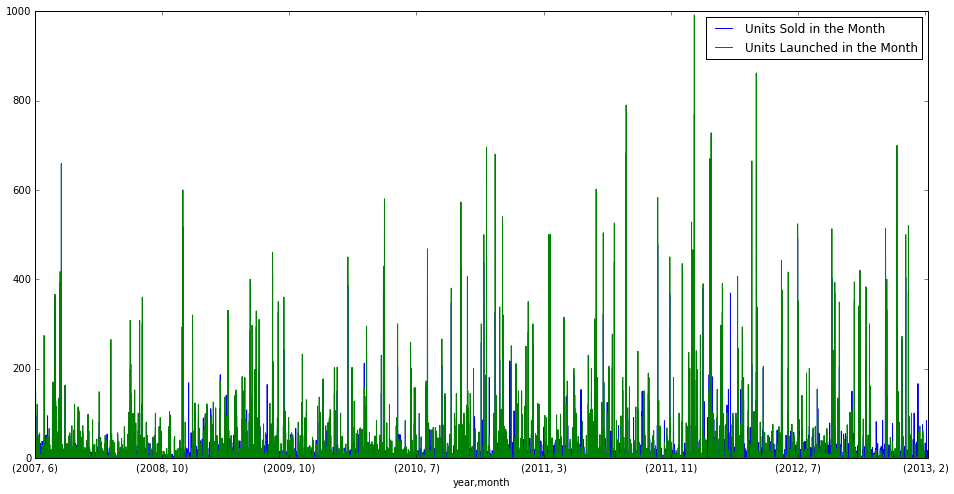

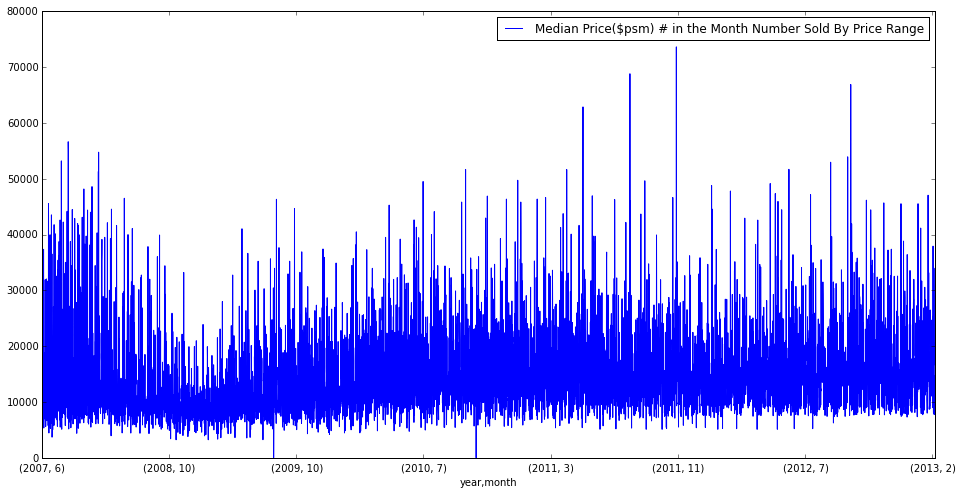

In [147]:
test = df.set_index(['year','month']).dropna()
test[['Units Sold in the Month',
    'Units Launched in the Month']].plot(figsize=(16,8))
test[['Median Price($psm) # in the Month Number Sold By Price Range']].plot(figsize=(16,8), kind='line')
# 'Total Number of Units in Project'